In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 5)

In [85]:
TRAIN_DIR = '../input/gdsc-nu-datathon-jusan-bank-case-competition/train_data.csv'
TEST_DIR = '../input/gdsc-nu-datathon-jusan-bank-case-competition/test_data.csv'

df_train = pd.read_csv(TRAIN_DIR)
df_test = pd.read_csv(TEST_DIR)

In [86]:
df_train 

,client_id,cato_code,gender,country,citizenship,age_days,client_days,opsos_code,phone_digits,max_dup,...,salary_10,transfers_amount_in_8,transfers_count_in_8,transfers_amount_out_8,transfers_count_out_8,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label
0,2152686,17.0,1.0,0.0,0.0,11643.0,130.0,9.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1712777,2.0,NaN,0.0,0.0,18095.0,994.0,5.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,458915,NaN,0.0,0.0,0.0,7955.0,1144.0,7.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.037251,0.033580,0.03358,NaN,0
3,530220,NaN,0.0,0.0,0.0,22580.0,847.0,0.0,6.0,1.0,...,0.036560,NaN,NaN,NaN,NaN,0.115086,0.033581,0.03358,0.092161,0
4,1103654,12.0,0.0,0.0,0.0,13107.0,547.0,12.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941526,1244050,6.0,1.0,0.0,0.0,11813.0,462.0,8.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
941527,1142266,12.0,0.0,0.0,0.0,11573.0,787.0,8.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
941528,1327217,9.0,1.0,0.0,0.0,11268.0,455.0,11.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03358,NaN,0
941529,1634056,5.0,1.0,0.0,NaN,17215.0,400.0,10.0,4.0,1.0,...,0.038471,NaN,NaN,NaN,NaN,0.041267,0.033580,0.03358,0.037430,0


Converting the datetime dtype columns to int values in order to use the dates as features to the model.

In [87]:
df_train['date_close'] = pd.to_datetime(df_train['date_close']).apply(lambda x: x.value)
df_train['deal_start_date_express'] = pd.to_datetime(df_train['deal_start_date_express']).apply(lambda x: x.value)
df_train['plan_end_date_express'] = pd.to_datetime(df_train['plan_end_date_express']).apply(lambda x: x.value)
df_train['deal_start_date_product'] = pd.to_datetime(df_train['deal_start_date_product']).apply(lambda x: x.value)
df_train['plan_end_date_product'] = pd.to_datetime(df_train['plan_end_date_product']).apply(lambda x: x.value)

In [88]:
df_train['date_close']

0        -9223372036854775808
1        -9223372036854775808
2         1664582400000000000
3        -9223372036854775808
4        -9223372036854775808
                 ...         
941526   -9223372036854775808
941527   -9223372036854775808
941528   -9223372036854775808
941529   -9223372036854775808
941530   -9223372036854775808
Name: date_close, Length: 941531, dtype: int64

In [89]:
# Checking datatypes of the dataset
df_train.dtypes

client_id                    int64
cato_code                  float64
gender                     float64
country                    float64
citizenship                float64
age_days                   float64
client_days                float64
opsos_code                 float64
phone_digits               float64
max_dup                    float64
monthly_installment        float64
date_close                   int64
deposit_sum_KZT            float64
deposit_sum_USD            float64
deposit_sum_EUR            float64
deal_sum_kzt_express       float64
expired_day_express        float64
deal_start_date_express      int64
plan_end_date_express        int64
deal_sum_kzt_product       float64
expired_day_product        float64
deal_start_date_product      int64
plan_end_date_product        int64
transfers_amount_in_9      float64
transfers_count_in_9       float64
transfers_amount_out_9     float64
transfers_count_out_9      float64
transactions_amount_9      float64
transactions_count_9

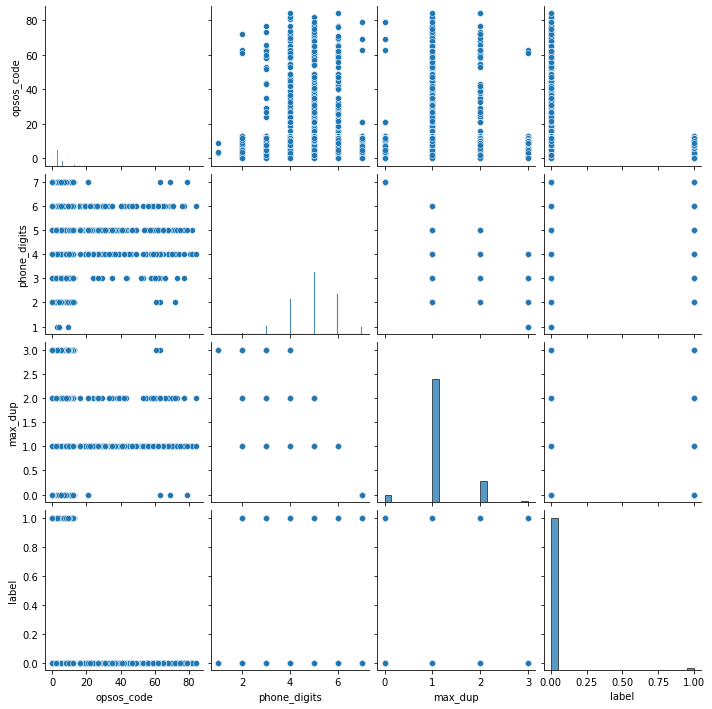

In [90]:
sns.pairplot(df_train[['opsos_code', 'phone_digits', 'max_dup', 'label']])
plt.show()

Deleting all unnecessary columns. Unnecessary implies that some columns contain no non-NaN values and some seem to have no correlation with the label.

In [91]:
DELETE_COLS = ['opsos_code', 'phone_digits', 'max_dup', 'client_id']

df_train.drop(columns=DELETE_COLS, axis=1, inplace=True)
df_train=df_train.dropna(axis=1,how='all')

In [92]:
df_train

,cato_code,gender,country,citizenship,age_days,client_days,monthly_installment,date_close,deposit_sum_KZT,deposit_sum_USD,...,transfers_count_in_10,transfers_amount_out_10,transfers_count_out_10,auth_count_10,salary_10,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label
0,17.0,1.0,0.0,0.0,11643.0,130.0,0.080061,-9223372036854775808,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2.0,NaN,0.0,0.0,18095.0,994.0,0.033579,-9223372036854775808,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,0.0,0.0,0.0,7955.0,1144.0,NaN,1664582400000000000,NaN,NaN,...,NaN,NaN,NaN,0.033580,NaN,0.037251,0.033580,0.03358,NaN,0
3,NaN,0.0,0.0,0.0,22580.0,847.0,0.047791,-9223372036854775808,NaN,NaN,...,0.033579,0.145198,0.03358,0.033581,0.036560,0.115086,0.033581,0.03358,0.092161,0
4,12.0,0.0,0.0,0.0,13107.0,547.0,0.057000,-9223372036854775808,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941526,6.0,1.0,0.0,0.0,11813.0,462.0,0.046441,-9223372036854775808,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
941527,12.0,0.0,0.0,0.0,11573.0,787.0,NaN,-9223372036854775808,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
941528,9.0,1.0,0.0,0.0,11268.0,455.0,0.039833,-9223372036854775808,NaN,NaN,...,NaN,NaN,NaN,0.033580,NaN,NaN,NaN,0.03358,NaN,0
941529,5.0,1.0,0.0,NaN,17215.0,400.0,NaN,-9223372036854775808,NaN,NaN,...,0.033579,0.038325,0.03358,0.033580,0.038471,0.041267,0.033580,0.03358,0.037430,0


In [93]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941531 entries, 0 to 941530
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cato_code                736732 non-null  float64
 1   gender                   870421 non-null  float64
 2   country                  857321 non-null  float64
 3   citizenship              645816 non-null  float64
 4   age_days                 936053 non-null  float64
 5   client_days              937166 non-null  float64
 6   monthly_installment      503229 non-null  float64
 7   date_close               941531 non-null  int64  
 8   deposit_sum_KZT          90525 non-null   float64
 9   deposit_sum_USD          90525 non-null   float64
 10  deposit_sum_EUR          90525 non-null   float64
 11  deal_sum_kzt_express     158439 non-null  float64
 12  expired_day_express      158439 non-null  float64
 13  deal_start_date_express  941531 non-null  int64  
 14  plan

# Handling dataset imbalanced-ness

### Handling NaN values using IterativeImputer

In [94]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression(n_jobs=-1)
imp = IterativeImputer(estimator=lr, missing_values=np.nan, max_iter=7, verbose=2, imputation_order='roman',random_state=0)
X_imp = imp.fit_transform(X)

[IterativeImputer] Completing matrix with shape (941531, 35)
[IterativeImputer] Ending imputation round 1/7, elapsed time 41.57
[IterativeImputer] Change: 25073.551519142005, scaled tolerance: 9223372036854776.0 
[IterativeImputer] Early stopping criterion reached.


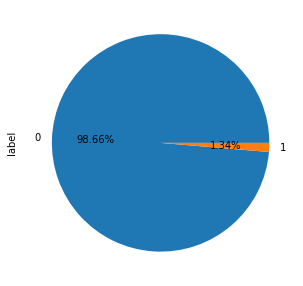

In [95]:
df_train['label'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

The given dataset is highly imbalanced. In order to handle it, we can oversample or undersample the dataset using `SMOTE`, `ADASYN`, and/or `RandomUnderSampler` algorithms.

In [96]:
X = np.array(df_train.drop(columns=['label'], axis=1))
y = np.array(df_train['label'])

In [97]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

## SMOTE

In [98]:
sme = SMOTE(sampling_strategy='minority', n_jobs=-1)

X_smote, y_smote = sme.fit_resample(X_imp, y)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2)

In [100]:
from catboost import CatBoostClassifier

# Implementing the CatBoostClassifier model with given parameters
model = CatBoostClassifier(loss_function="Logloss")

model.fit(X_train, y_train)

Learning rate set to 0.233038
0:	learn: 0.4442432	total: 398ms	remaining: 6m 37s
1:	learn: 0.3383700	total: 735ms	remaining: 6m 6s
2:	learn: 0.2836951	total: 1.07s	remaining: 5m 56s
3:	learn: 0.2501666	total: 1.4s	remaining: 5m 47s
4:	learn: 0.2312236	total: 1.72s	remaining: 5m 41s
5:	learn: 0.2156042	total: 2.04s	remaining: 5m 38s
6:	learn: 0.1993741	total: 2.37s	remaining: 5m 36s
7:	learn: 0.1888188	total: 2.66s	remaining: 5m 30s
8:	learn: 0.1809673	total: 2.98s	remaining: 5m 28s
9:	learn: 0.1740479	total: 3.29s	remaining: 5m 25s
10:	learn: 0.1634252	total: 3.62s	remaining: 5m 25s
11:	learn: 0.1594359	total: 3.9s	remaining: 5m 21s
12:	learn: 0.1522326	total: 4.23s	remaining: 5m 20s
13:	learn: 0.1498967	total: 4.53s	remaining: 5m 18s
14:	learn: 0.1463327	total: 4.81s	remaining: 5m 16s
15:	learn: 0.1428893	total: 5.1s	remaining: 5m 13s
16:	learn: 0.1408515	total: 5.35s	remaining: 5m 9s
17:	learn: 0.1375299	total: 5.65s	remaining: 5m 8s
18:	learn: 0.1317172	total: 5.94s	remaining: 5m 6s

In [101]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    185990
           1       0.99      0.99      0.99    185594

    accuracy                           0.99    371584
   macro avg       0.99      0.99      0.99    371584
weighted avg       0.99      0.99      0.99    371584



## ADASYN

In [102]:
adasyn = ADASYN()

X_ada, y_ada = adasyn.fit_resample(X_imp, y)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_ada, y_ada, test_size=0.2)

In [104]:
from catboost import CatBoostClassifier

# Implementing the CatBoostClassifier model with given parameters
model = CatBoostClassifier(loss_function="Logloss")

model.fit(X_train, y_train)

Learning rate set to 0.232949
0:	learn: 0.4555482	total: 406ms	remaining: 6m 45s
1:	learn: 0.3590296	total: 727ms	remaining: 6m 2s
2:	learn: 0.3123560	total: 1.03s	remaining: 5m 41s
3:	learn: 0.2728343	total: 1.36s	remaining: 5m 38s
4:	learn: 0.2487025	total: 1.66s	remaining: 5m 29s
5:	learn: 0.2337305	total: 1.96s	remaining: 5m 24s
6:	learn: 0.2200500	total: 2.27s	remaining: 5m 22s
7:	learn: 0.2073159	total: 2.56s	remaining: 5m 17s
8:	learn: 0.1974192	total: 2.89s	remaining: 5m 18s
9:	learn: 0.1855421	total: 3.23s	remaining: 5m 19s
10:	learn: 0.1801962	total: 3.49s	remaining: 5m 14s
11:	learn: 0.1740022	total: 3.79s	remaining: 5m 12s
12:	learn: 0.1691920	total: 4.07s	remaining: 5m 9s
13:	learn: 0.1555527	total: 4.42s	remaining: 5m 11s
14:	learn: 0.1516337	total: 4.71s	remaining: 5m 9s
15:	learn: 0.1482195	total: 4.98s	remaining: 5m 6s
16:	learn: 0.1448543	total: 5.25s	remaining: 5m 3s
17:	learn: 0.1425727	total: 5.59s	remaining: 5m 5s
18:	learn: 0.1400272	total: 5.86s	remaining: 5m 2s

In [105]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    185680
           1       0.99      0.99      0.99    185568

    accuracy                           0.99    371248
   macro avg       0.99      0.99      0.99    371248
weighted avg       0.99      0.99      0.99    371248



## RandomUnderSampling

In [106]:
under = RandomUnderSampler(sampling_strategy=0.5)

X_under, y_under = under.fit_resample(X_imp, y)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2)

In [108]:
from catboost import CatBoostClassifier

# Implementing the CatBoostClassifier model with given parameters
model = CatBoostClassifier(loss_function="Logloss")

model.fit(X_train, y_train)

Learning rate set to 0.044131
0:	learn: 0.6558616	total: 15.5ms	remaining: 15.5s
1:	learn: 0.6223939	total: 30.5ms	remaining: 15.2s
2:	learn: 0.5917528	total: 43.7ms	remaining: 14.5s
3:	learn: 0.5639544	total: 60.8ms	remaining: 15.1s
4:	learn: 0.5403928	total: 75.2ms	remaining: 15s
5:	learn: 0.5189778	total: 88.6ms	remaining: 14.7s
6:	learn: 0.5000400	total: 102ms	remaining: 14.5s
7:	learn: 0.4823646	total: 116ms	remaining: 14.4s
8:	learn: 0.4665866	total: 129ms	remaining: 14.2s
9:	learn: 0.4513145	total: 144ms	remaining: 14.3s
10:	learn: 0.4376204	total: 158ms	remaining: 14.2s
11:	learn: 0.4260302	total: 173ms	remaining: 14.3s
12:	learn: 0.4153493	total: 187ms	remaining: 14.2s
13:	learn: 0.4054429	total: 202ms	remaining: 14.3s
14:	learn: 0.3960447	total: 219ms	remaining: 14.4s
15:	learn: 0.3880609	total: 234ms	remaining: 14.4s
16:	learn: 0.3801046	total: 248ms	remaining: 14.4s
17:	learn: 0.3740842	total: 267ms	remaining: 14.6s
18:	learn: 0.3675348	total: 282ms	remaining: 14.6s
19:	lea

In [109]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4971
           1       0.89      0.83      0.86      2573

    accuracy                           0.91      7544
   macro avg       0.90      0.89      0.89      7544
weighted avg       0.91      0.91      0.91      7544



The above models (and more others not included in this dataset) performed poorly on the Kaggle score.

# Implementing Tree-based models

Since the oversampling and undersampling algorithms resulted in quite low accuracy and f1-score values. This is why we decided to not work with the imbalanced-ness, but use models that handle imbalaced-ness themselves, such as `XGBoost Classifier`, `CatBoostClassifier`, `LGBMClassifier`.

In [110]:
from sklearn.metrics import classification_report, accuracy_score

## CatBoostClassifier

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [112]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (941531, 35)
y shape: (941531,)


In [115]:
from catboost import CatBoostClassifier

# Implementing the CatBoostClassifier model with given parameters
model = CatBoostClassifier(loss_function="Logloss",
                           eval_metric="F1",
                           learning_rate=0.02,
                           l2_leaf_reg=0.1,
                           iterations=5000,
                           random_seed=42,
                           od_type="Iter",
                           depth=8,
                           early_stopping_rounds=20)

model.fit(X_train, y_train)

0:	learn: 0.0312083	total: 171ms	remaining: 14m 12s
1:	learn: 0.0104646	total: 337ms	remaining: 14m 2s
2:	learn: 0.0195569	total: 489ms	remaining: 13m 33s
3:	learn: 0.0035778	total: 631ms	remaining: 13m 8s
4:	learn: 0.0016856	total: 776ms	remaining: 12m 54s
5:	learn: 0.0018963	total: 941ms	remaining: 13m 3s
6:	learn: 0.0012646	total: 1.1s	remaining: 13m 7s
7:	learn: 0.0012646	total: 1.27s	remaining: 13m 12s
8:	learn: 0.0006325	total: 1.44s	remaining: 13m 18s
9:	learn: 0.0008433	total: 1.62s	remaining: 13m 30s
10:	learn: 0.0008433	total: 1.78s	remaining: 13m 28s
11:	learn: 0.0012646	total: 1.95s	remaining: 13m 30s
12:	learn: 0.0016858	total: 2.11s	remaining: 13m 28s
13:	learn: 0.0018963	total: 2.33s	remaining: 13m 51s
14:	learn: 0.0025276	total: 2.52s	remaining: 13m 56s
15:	learn: 0.0021068	total: 2.71s	remaining: 14m 5s
16:	learn: 0.0025276	total: 2.89s	remaining: 14m 6s
17:	learn: 0.0025276	total: 3.06s	remaining: 14m 7s
18:	learn: 0.0023173	total: 3.23s	remaining: 14m 6s
19:	learn: 0

In [117]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    232293
           1       0.74      0.32      0.45      3090

    accuracy                           0.99    235383
   macro avg       0.86      0.66      0.72    235383
weighted avg       0.99      0.99      0.99    235383



This model gave us the 0.727 f1-score on the Kaggle leaderboard.

## XGBoost

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [119]:
import xgboost

seed = 7
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [120]:
# Getting the predictions from the model
y_pred_proba = model.predict(X_test)
y_pred = np.array([round(value) for value in y_pred_proba])

In [121]:
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.9889445327737475
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    306441
           1       0.71      0.33      0.45      4265

    accuracy                           0.99    310706
   macro avg       0.85      0.67      0.72    310706
weighted avg       0.99      0.99      0.99    310706



This was the best model with the Kaggle f1-score 0.73.

# Working with the test dataset

In [122]:
df_test['date_close'] = pd.to_datetime(df_test['date_close']).apply(lambda x: x.value)
df_test['deal_start_date_express'] = pd.to_datetime(df_test['deal_start_date_express']).apply(lambda x: x.value)
df_test['plan_end_date_express'] = pd.to_datetime(df_test['plan_end_date_express']).apply(lambda x: x.value)
df_test['deal_start_date_product'] = pd.to_datetime(df_test['deal_start_date_product']).apply(lambda x: x.value)
df_test['plan_end_date_product'] = pd.to_datetime(df_test['plan_end_date_product']).apply(lambda x: x.value)

In [123]:
df_test.drop(columns=DELETE_COLS, axis=1, inplace=True)
df_test=df_test.dropna(axis=1,how='all')

In [124]:
df_test

,cato_code,gender,country,citizenship,age_days,client_days,monthly_installment,date_close,deposit_sum_KZT,deposit_sum_USD,...,transfers_amount_in_10,transfers_count_in_10,transfers_amount_out_10,transfers_count_out_10,auth_count_10,salary_10,transactions_amount_8,transactions_count_8,auth_count_8,salary_8
0,2.0,1.0,0.0,0.0,17150.0,1638.0,NaN,-9223372036854775808,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,1.0,0.0,NaN,14278.0,416.0,NaN,-9223372036854775808,0.034253,0.033579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,1.0,0.0,NaN,19040.0,225.0,NaN,-9223372036854775808,NaN,NaN,...,0.033579,0.033579,0.034671,0.03358,0.033580,NaN,0.057141,0.033580,0.033580,NaN
3,4.0,1.0,0.0,0.0,28811.0,2919.0,NaN,-9223372036854775808,0.353610,0.033579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,0.0,0.0,26687.0,2919.0,NaN,-9223372036854775808,0.493290,3.150814,...,0.075314,0.033580,0.033681,0.03358,0.033581,NaN,0.157054,0.033583,0.033582,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463734,NaN,NaN,NaN,NaN,NaN,NaN,0.037898,-9223372036854775808,0.033652,0.033579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9223372036854775808,0.033647,0.033579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463736,NaN,NaN,NaN,NaN,NaN,NaN,0.041363,-9223372036854775808,NaN,NaN,...,NaN,NaN,NaN,NaN,0.033580,NaN,NaN,NaN,NaN,NaN
463737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9223372036854775808,0.033651,0.033579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
y_pred = model.predict(df_test)

In [126]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Writing test results into sample_res file

In [127]:
sample_res= pd.read_csv('../input/gdsc-nu-datathon-jusan-bank-case-competition/sample_res.csv')

In [128]:
sample_res['target'] = y_pred

In [129]:
sample_res['target'].value_counts()

0    460684
1      3055
Name: target, dtype: int64

In [130]:
sample_res.to_csv('sample_res.csv', index = False)